The correct order is:  

1. **Missing values imputation** → Handle missing data first to avoid issues in later steps.  
2. **Outlier removal** → Remove extreme values after imputation, as missing value treatment might introduce new outliers.  
3. **Feature transformation** → Apply transformations like scaling, log transformation,assigning weightages etc., to standardize or normalize data.  
4. **Feature encoding** → Convert categorical variables into numerical format for model compatibility.  (One-Hot Encoding, Label Encoding, etc.) 
5. **Feature extraction** → Derive new features from existing ones (e.g., PCA, text embeddings).  
6. **Feature selection** → Remove irrelevant or redundant features to improve model performance.  

# for column transformer, feature union and pipeline read directly from BP 154 ,and read from point 2.column transformer only 

# 1. Importing Libraries

In [4]:
import os
import numpy as np
import pandas as pd
import ast
from scipy.stats import iqr,yeojohnson, skew, kurtosis
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import regex as re
import eda_helper_functions
import matplotlib.gridspec as gridspec
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

# note : missing value Imputation should be done after train-test split — but only fitted on training data.
# and also remember that whatever we do for train data do that immidiatly for test data also 
# so below visualization also do after train test split only 

In [2]:
df = pd.read_csv('3rd_after_multivariate_analysis_dataset.csv')

In [3]:
df.shape

(11894, 46)

# Null values 

In [5]:
#let's see if our dataset contains missing values.

df.isna().sum().sum()

112331

- 112331 is a big number that tells us there are a lot of missing values in dataset

In [6]:
df.isna().sum()

id                                0
url                               0
image                           888
name                              0
wholeaddress                      0
address                           0
flooring                          0
image_urls                     4249
available_units                5218
towers                         5026
locality_rank                  3831
locality_rating                 464
construction                   1056
overlooking                    3962
ownership                      3604
extra_rooms                    5296
bath                             30
parking                        6232
builder                        4273
project_name                   3495
furnish                          39
price                             0
area                              5
costpersqft                       6
property_type                     3
status                           83
lift                           5439
flat_on_floor               

In [7]:
import pandas as pd

# Null Values Analysis
def null_features(df):
    # Prepare dataset EDA values
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Uniques'] = df.nunique().values
    summary['Null'] = df.isna().sum().values
    summary['Null(%)'] = round((summary['Null'] / len(df) * 100), 1).astype(str) + '%'
    
    # Add a column to indicate whether the feature has missing values
    summary['Has Null'] = summary['Null'] > 0

    # Sort by Null count (descending) and Name (ascending)
    summary = summary.sort_values(by=['Null', 'Name'], ascending=[False, True])
    summary.index = range(1, len(summary) + 1)
    
    return summary

# Example usage
#null_summary = null_features(df)
#print(null_summary)
null_features(df)

Name   dtypes  Uniques   Null Null(%)  Has Null
1                      tourist   object       16  10341   86.9%      True
2                     hospital   object       56   8595   72.3%      True
3                      parking  float64       10   6232   52.4%      True
4                    transport   object      144   6074   51.1%      True
5                      balcony  float64        8   5820   48.9%      True
6             project_in_acres  float64      205   5776   48.6%      True
7                         lift  float64       10   5439   45.7%      True
8                  extra_rooms   object       16   5296   44.5%      True
9              available_units  float64      589   5218   43.9%      True
10              commercial_hub   object      134   5138   43.2%      True
11                      towers  float64       42   5026   42.3%      True
12                     builder   object     1146   4273   35.9%      True
13                   education   object      187   4258   35.8%      True
14                  image_urls   object     3407   4249   35.7%      True
15                 overlooking   object        7   3962   33.3%      True
16             shopping_centre   object      187   3880   32.6%      True
17               locality_rank  float64      179   3831   32.2%      True
18                      facing   object        8   3730   31.4%      True
19                   ownership   object        4   3604   30.3%      True
20                project_name   object     2943   3495   29.4%      True
21               flat_on_floor  float64       71   2292   19.3%      True
22                 total_floor  float64       85   2059   17.3%      True
23                construction   object        7   1056    8.9%      True
24                       image   object     9860    888    7.5%      True
25             locality_rating  float64       26    464    3.9%      True
26                   lattitude  float64     2924    463    3.9%      True
27                   longitude  float64     2859    463    3.9%      True
28  location_from_wholeaddress   object      956    241    2.0%      True
29                      status   object        3     83    0.7%      True
30                     furnish   object        3     39    0.3%      True
31                        bath  float64       10     30    0.3%      True
32                 costpersqft  float64     7498      6    0.1%      True
33                        area  float64     1527      5    0.0%      True
34               property_type   object        2      3    0.0%      True
35                         emi  float64      589      2    0.0%      True
36                     address   object     5683      0    0.0%     False
37               addressregion   object        4      0    0.0%     False
38                         bed  float64        9      0    0.0%     False
39                    flooring   object      253      0    0.0%     False
40                          id   object    11894      0    0.0%     False
41                        name   object     5728      0    0.0%     False
42                       price  float64     1170      0    0.0%     False
43              price_category   object       13      0    0.0%     False
44                      seller   object        3      0    0.0%     False
45                         url   object    11894      0    0.0%     False
46                wholeaddress   object      921      0    0.0%     False

In [8]:
#First we create a list of missing values by each feature
temp = list(df.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in df.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

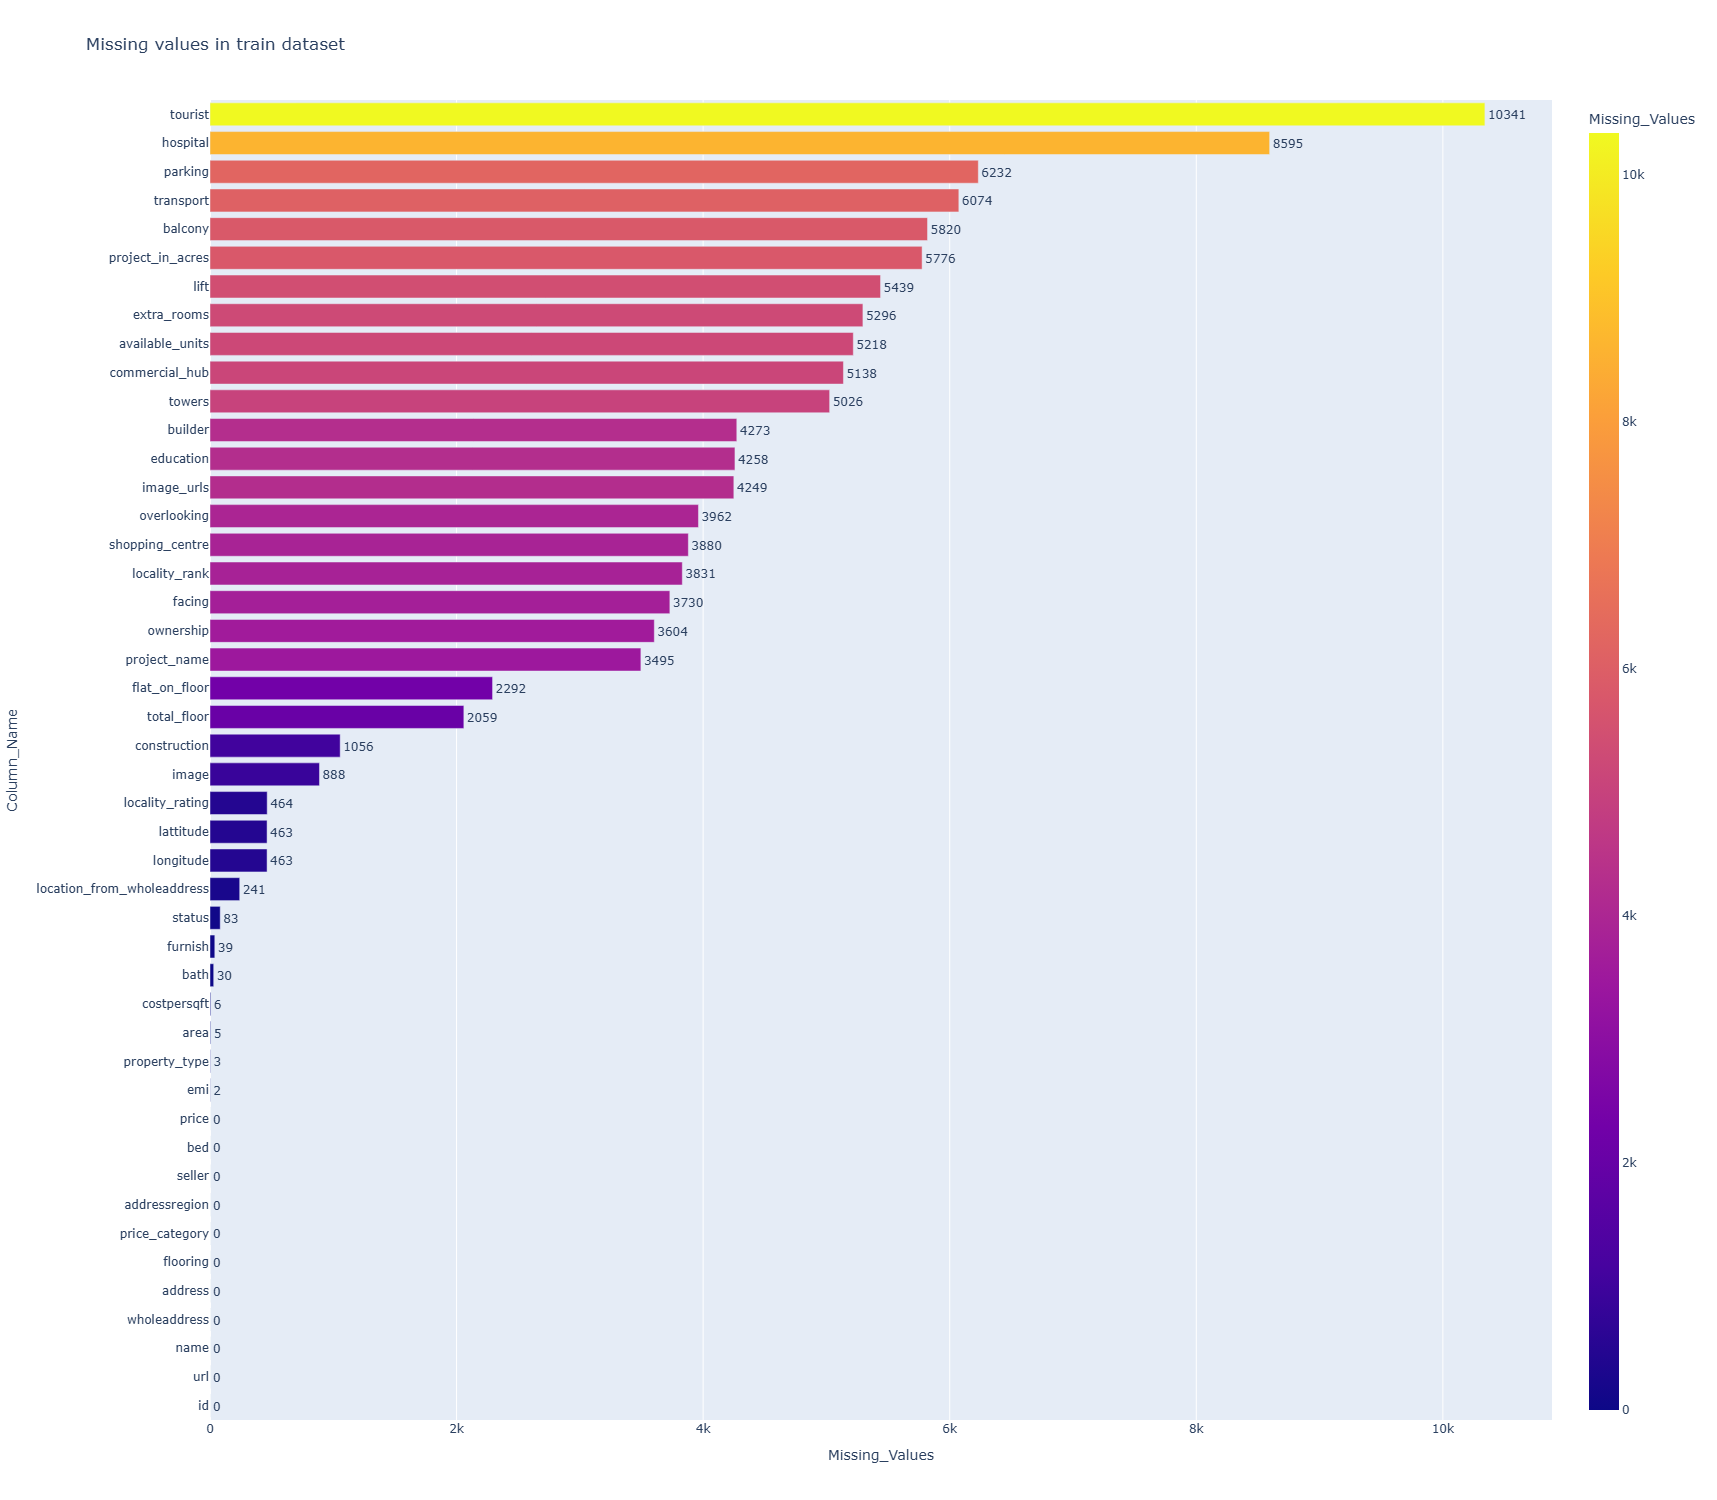

In [9]:
fig = px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1500,width=900,color='Missing_Values',text='Missing_Values',title='Missing values in train dataset')
fig.update_traces(textposition='outside')
fig.show()

In [10]:
#The following columns have missing values

temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

### obsrvation 
- total 34 columns have missing values
- total __ numerical features have missing values
- total __ categorical features have missing values

# Handling missing values



 - missingo library(bp158)
 - identify MAR 2 techniques (bp158)

 - There are 3 techniques from which we can handle missing values

    - 1.removing: remove all missing values

    - 2.Imputation: we trying to fill the missing values , will see techniques for this latter

    - 3.Use algorithms that can handle missing values by themselves :eg XgBoost and LightGBM

 - if MAR then we use imputation and algos
 - if MCAR then we can use all 3 i.e remove,imputation and algos

 -  Certain imputation methods are better suited to continuous data (e.g., mean imputation), while others work well with categorical data (e.g., mode imputation or using predictive models).

 - try to preserve the distribution of the data before and after filling missing values

I have read from 152 to 158   

- ColumnTransformer allows us to apply different transformations to different columns simultaneously within a single workflow.
- more than one tranformation on same column we can do using feature union and Feature union apply multiple transformers parallely on the entire dataset
- Pipeline apply multiple transformers sequentially on the entire dataset

# Lets see the roadmap to handle the missing values
# Handling Missing Values:

**Roadmap to Handle Missing Values**

**1. Analyze Missingness**
- **Check % of missing values** per column and row.
- Visualize missing data patterns (e.g., heatmaps, missingno).

---

**2. Handling Methods**

**A. Removing Missing Data**
- **Column-wise**:
  - Drop columns with **too many missing values** (e.g., >40-50%).
- **Row-wise**:
  - Drop rows if they have **many missing fields** and are not critical.

---

**B. Imputing Missing Data**

i. **Univariate Imputation (Column-wise)**
- Univariate: Fill missing values in one column at a time. (e.g., Simple Imputer) 
- **Mean** (for normal distributions).
- **Median** (for skewed distributions).
- **Mode** (for categorical features).

ii. **Multivariate Imputation (Multiple columns together)**
- Multivariate Imputation: It is a method used to fill in missing values across multiple columns simultaneously.
- **KNN Imputer** (uses nearest neighbors).
- **Iterative Imputer** (models each feature with missing values as a function of other features).

---

**C. Statistical & Machine Learning Techniques**

- **Mean / Median / Mode Imputation** (basic stats methods).
- **Regression Imputation** (predict missing using other features).
- **Multiple Imputation (MICE)** (generate multiple filled datasets to reduce bias).
- **Random Forest Imputer** (tree-based estimation).
- **XGBoost / LightGBM-based Imputation** (powerful gradient boosting methods for complex patterns).

---

**3. Evaluate Impact of Imputation**
- Compare data distribution **before & after** imputation.
- Check for **data leakage** risk (especially with target leakage).

---

**4. Pipeline Integration**
- Integrate chosen imputation methods into **sklearn Pipelines** for consistency during model training and prediction.

lets see 1st 7 notebooks which I have downloded what they did   
from a. eda-and-prediction-of-house-price
- they check box plot then mean and median and then fill the missing values by median for both train and test dataset,remember that we fill missing values using median when we have skewed distribution 
- if feature like garage , if in this column if there are missing values then we fill that using no garage ,becoz we can predict properties have garage or not

from c.house-price-prediction
- Since all features are categorical, using mode imputation (most frequent value) is the best choice. we can't take the mean nor the median
- As mentioned before that the 'NA' value in many columns represent the absence of that feature for a particular house, we will replace those null values with None. 'None' for categorical feature and 0 for numerical feature.
- features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
   - for above code : To fill missing values (NaN) in the MSZoning column. But instead of considering the whole MSSubClass column, what they did is they fill missing values based on the mode of each group defined by MSSubClass.

In [11]:
#missing value in percentage
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_values_percentage)


Percentage of missing values in each column:
id                             0.000000
url                            0.000000
image                          7.465949
name                           0.000000
wholeaddress                   0.000000
address                        0.000000
flooring                       0.000000
image_urls                    35.723894
available_units               43.870859
towers                        42.256600
locality_rank                 32.209517
locality_rating                3.901127
construction                   8.878426
overlooking                   33.310913
ownership                     30.300992
extra_rooms                   44.526652
bath                           0.252228
parking                       52.396166
builder                       35.925677
project_name                  29.384564
furnish                        0.327896
price                          0.000000
area                           0.042038
costpersqft                    0.0

# Missingo for Missing Values

In [8]:
df.shape

(11898, 49)

<Axes: >

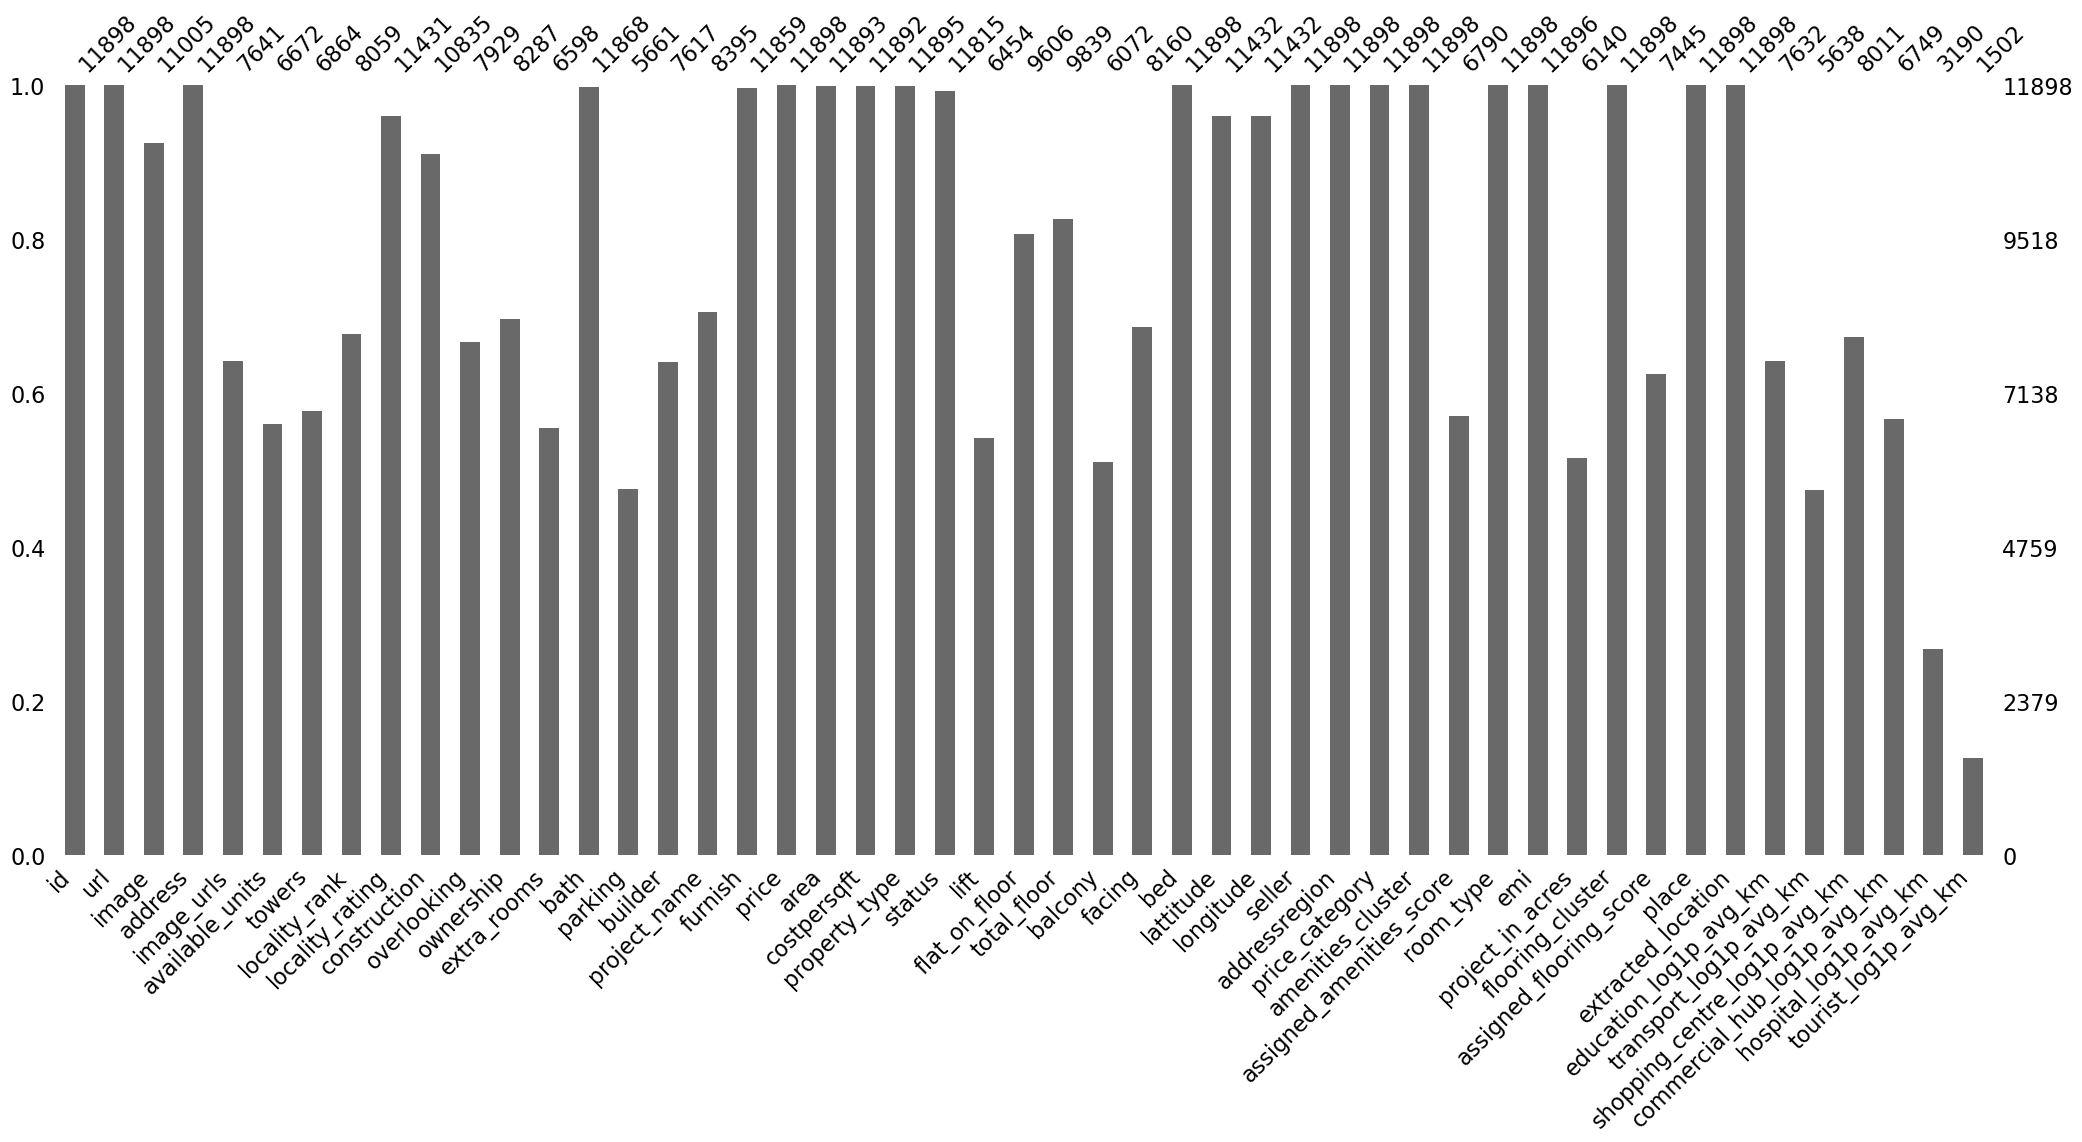

In [9]:
# Bar plot to visualize missing values
msno.bar(df)

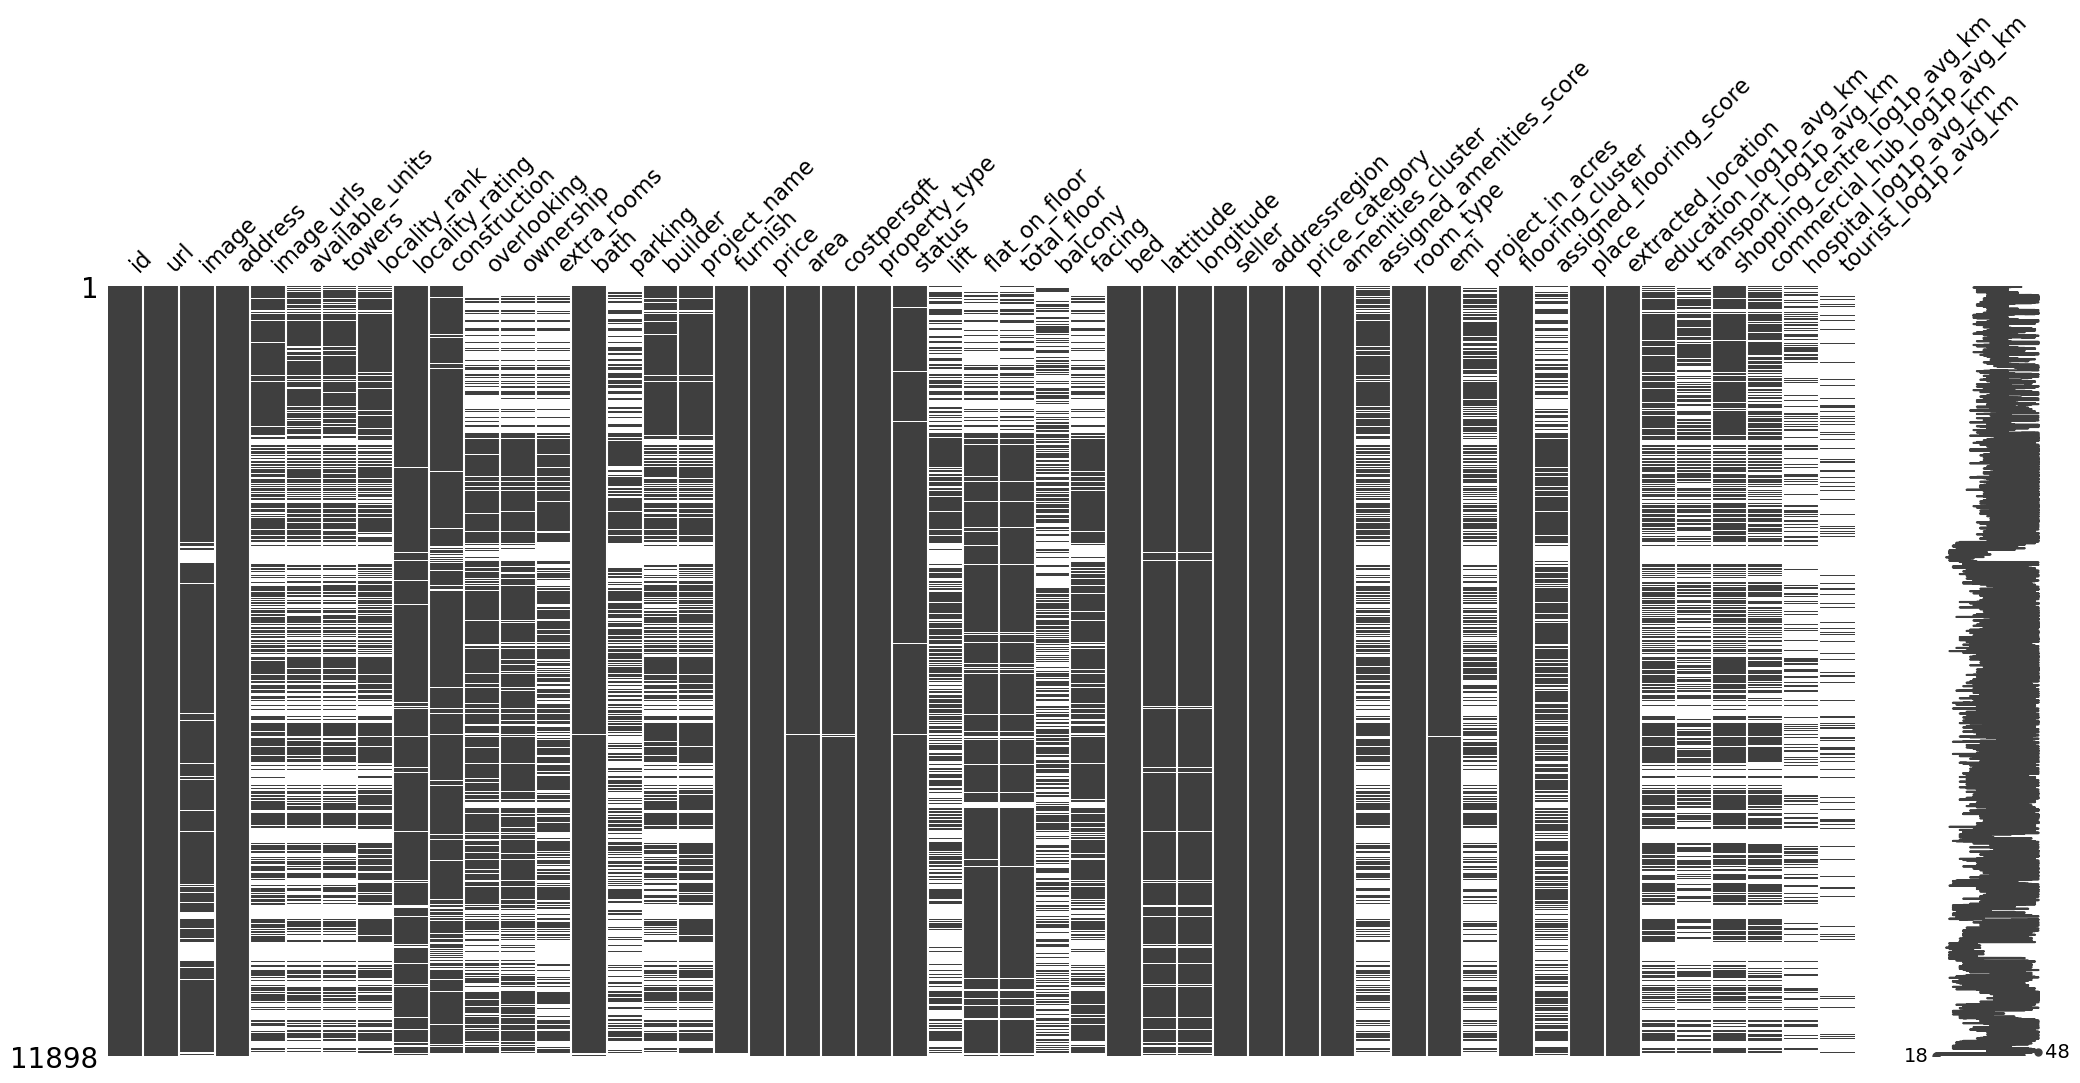

In [10]:
# Matrix chart to visualize missing values
msno.matrix(df)
plt.show()

# Observation from above graph

write where you find the similarity of missing between 2 or many columns 


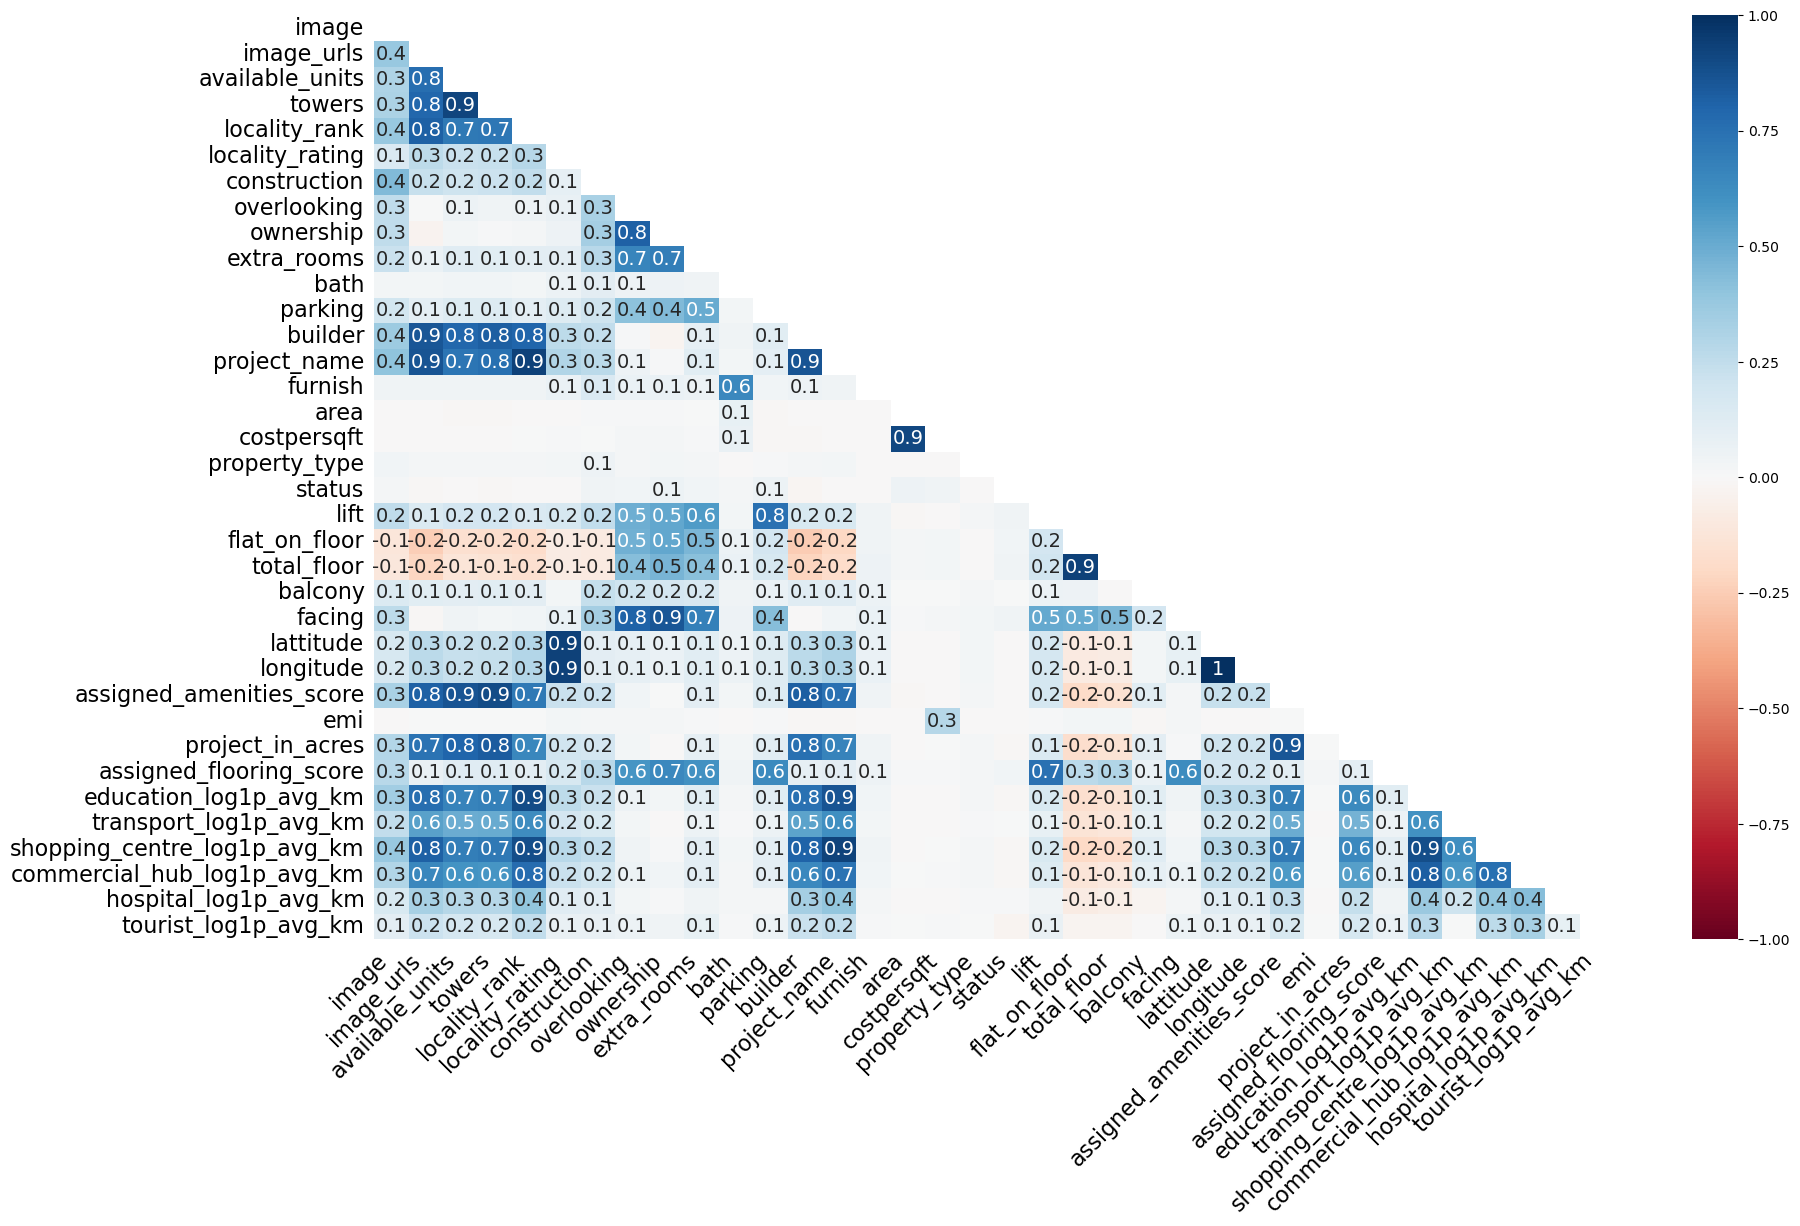

In [11]:
# Heatmap to visualize the correlation of missingness between columns
msno.heatmap(df)
plt.show()

In [12]:
#explain above also 

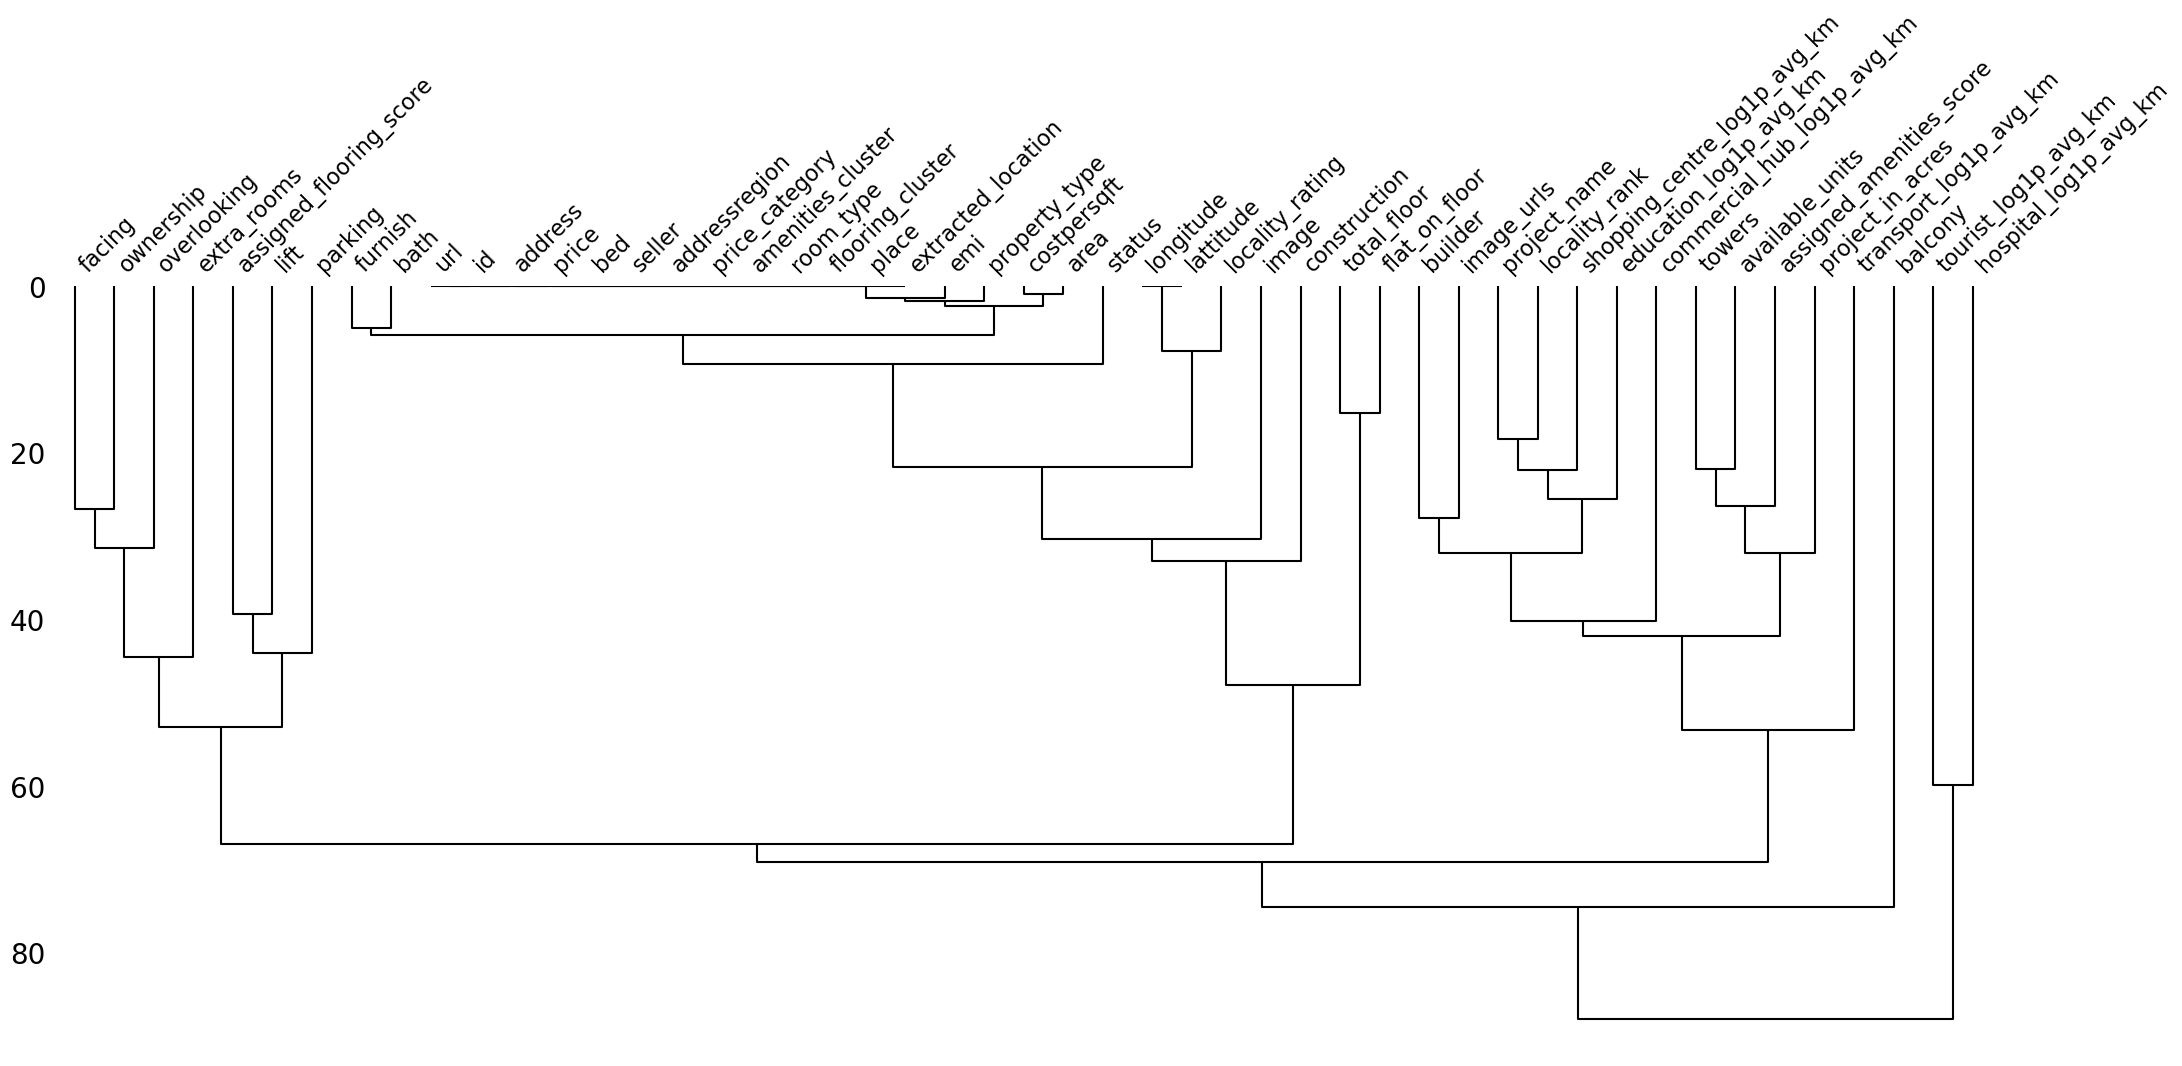

In [13]:
# Dendrogram to visualize the hierarchical clustering of missing values
msno.dendrogram(df)
plt.show()

 so missing values in the real estate data may becoz of the following reasons   
1)Unavailability: Some details are genuinely not applicable to all properties (e.g., no extra rooms or amenities).   
2)Human Error: Mistakes in data entry, oversight, or skipping fields during data collection.  
3)lack of information   
4)Confidentiality: Certain data points (e.g., seller details, builder names) may be intentionally omitted.  


<Axes: xlabel='bed', ylabel='Count'>

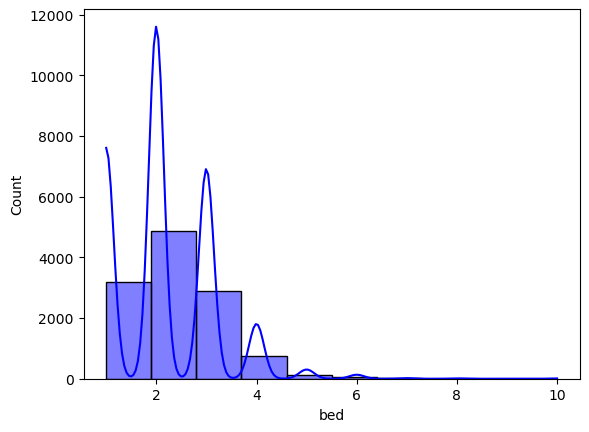

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['bed'], bins=10, kde=True, color='blue')